In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import numpy as np

In [2]:
df = pd.read_csv('./assignments_from_pool_Quality_3.tsv', sep="\t")

In [3]:
df = df.drop(columns=['GOLDEN:ad', 'GOLDEN:not_ad', 'GOLDEN:ban_insult_hard', 'GOLDEN:ban_shock_content', 'GOLDEN:ban_shock_content',
'HINT:text', 'HINT:default_language'])


In [4]:
df = df.fillna(0)
def f(row):
    if row['OUTPUT:ad'] == 'yes':
        val = 'ad'
    elif row['OUTPUT:not_ad'] != 0:
        val = 'not_ad'
    elif row['OUTPUT:ban_insult_hard'] != 0:
        val = 'ban_insult_hard'
    elif row['OUTPUT:ban_shock_content'] != 0:
        val = 'ban_shock_content'    
    else:
        val = ' '
    return val

df['OUTPUT:label'] = df.apply(f, axis=1)



In [5]:
df.head()

,INPUT:label,INPUT:comment,INPUT:task-id,OUTPUT:ad,OUTPUT:not_ad,OUTPUT:ban_insult_hard,OUTPUT:ban_shock_content,ASSIGNMENT:worker_id,OUTPUT:label
0,not_ad,"Почему такие старые автобусы ездят в Казани, о...",487,no,True,0,0,816ea89a07e831e72b3b7c83dbcc6531,not_ad
1,ad,Скидки на товары для подарков.. ♦️ВНИМАНИЕ♦️ВН...,48,yes,0,0,0,816ea89a07e831e72b3b7c83dbcc6531,ad
2,ban_shock_content,Разгон протестующих водомётами. 13.09.#. Брест...,300,yes,0,0,0,816ea89a07e831e72b3b7c83dbcc6531,ad
3,ban_shock_content,В Астрахани в 5 утра на Аэропортовском шоссе п...,310,no,0,0,True,816ea89a07e831e72b3b7c83dbcc6531,ban_shock_content
4,ad,Приходите к нам в April to you :). Комбо сняти...,33,yes,0,0,0,816ea89a07e831e72b3b7c83dbcc6531,ad


In [6]:
df = df.drop(columns=['OUTPUT:ad', 'OUTPUT:not_ad', 'OUTPUT:ban_insult_hard', 'OUTPUT:ban_shock_content'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   INPUT:label           1809 non-null   object
 1   INPUT:comment         1809 non-null   object
 2   INPUT:task-id         1809 non-null   int64 
 3   ASSIGNMENT:worker_id  1809 non-null   object
 4   OUTPUT:label          1809 non-null   object
dtypes: int64(1), object(4)
memory usage: 70.8+ KB


In [8]:
#сохранения в tsv
df.to_csv('Quality_3.tsv', sep="\t", index=False)

In [9]:
df[df['INPUT:label'] == df['OUTPUT:label']].count()[0]

1602

In [10]:
df[df['INPUT:label'] != df['OUTPUT:label']].count()[0]

207

In [11]:
# 14.5% неправильных ответов
df[df['INPUT:label'] != df['OUTPUT:label']].count()[0]/df[df['INPUT:label'] == df['OUTPUT:label']].count()[0]

0.12921348314606743

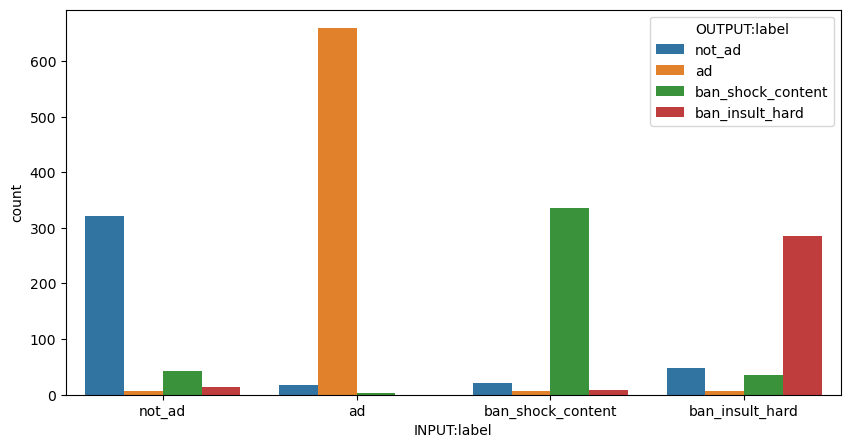

In [12]:
# 
_, axes = plt.subplots(1, sharey=True, figsize=(10,5))


sns.countplot(x='INPUT:label', hue='OUTPUT:label', data=df);

In [13]:
df[df['INPUT:label'] != df['OUTPUT:label']]

,INPUT:label,INPUT:comment,INPUT:task-id,ASSIGNMENT:worker_id,OUTPUT:label
2,ban_shock_content,Разгон протестующих водомётами. 13.09.#. Брест...,300,816ea89a07e831e72b3b7c83dbcc6531,ad
11,ban_insult_hard,Заправка Лукойл. Заправлялся на лукойле на пер...,213,816ea89a07e831e72b3b7c83dbcc6531,not_ad
26,not_ad,"Почему такие старые автобусы ездят в Казани, о...",487,0713a0890fd7ab152061589bb18c0d6d,ban_shock_content
33,not_ad,Хорошо что есть дистанционное обучение в школа...,497,816ea89a07e831e72b3b7c83dbcc6531,ad
34,ban_insult_hard,ПОЧЕМУ МОЛЧАТ РОССИЯНЕ.... Уже ни для кого в Р...,241,816ea89a07e831e72b3b7c83dbcc6531,ban_shock_content
...,...,...,...,...,...
1730,not_ad,Хорошо что есть дистанционное обучение в школа...,497,0d4b5165b310a9cc2702ba783740e315,ban_shock_content
1738,not_ad,В последние дни погода совсем не радует. Лето ...,442,b3760185737229c7076a484057fd7631,ban_shock_content
1746,ban_shock_content,❗В областном центре прошло первое судебное зас...,395,8457fa89ddc6e4aad907373316a347d1,not_ad
1762,not_ad,"Почему такие старые автобусы ездят в Казани, о...",487,09f1883c3e227ba0bad347ecc3f6fe52,ban_shock_content


NameError: name 'data' is not defined